In [118]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [119]:
import nltk
import pandas as pd


In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/flatironschool/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [120]:
#import data
data_file = 'Amazon_Unlocked_Mobile.csv'
data_raw = pd.read_csv( data_file, delimiter = ",")

In [121]:
data=data_raw.copy()
data = data[data['Reviews'].isnull()==False]

In [122]:
data['word_count'] = [len(review.split()) for review in data['Reviews']]

In [123]:
data = data[data['word_count']<150]

In [124]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [125]:
sid=SentimentIntensityAnalyzer()

In [126]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

In [127]:
data['score']=data['Reviews'].apply(lambda review: sid.polarity_scores(review))

Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-41:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/_threaded_server.py", line 362, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", 

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-44:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/_threaded_server.py", line 362, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", 

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK


In [37]:
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,word_count,score
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,72,"{'neg': 0.015, 'neu': 0.796, 'pos': 0.189, 'co..."
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,40,"{'neg': 0.072, 'neu': 0.597, 'pos': 0.331, 'co..."
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,2,"{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'comp..."
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,17,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound..."
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,43,"{'neg': 0.038, 'neu': 0.897, 'pos': 0.065, 'co..."


In [17]:
data['score'][0]

{'neg': 0.015, 'neu': 0.796, 'pos': 0.189, 'compound': 0.8783}

In [18]:
data['compound']=data['score'].apply(lambda d:d['compound'])

In [19]:
data.drop(['Price','word_count'],axis=1,inplace=True)

In [20]:
data.drop(['Brand Name','Review Votes'],axis=1,inplace=True)

In [97]:
# data.head(20)

#### Latent Dirichlet Allocation

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
cv=CountVectorizer(  stop_words='english',
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 3),
    max_df=.9,
    min_df=3)

In [98]:
dtm=cv.fit_transform(data['Reviews'])

In [99]:
from sklearn.decomposition import LatentDirichletAllocation

In [100]:
lda=LatentDirichletAllocation(n_components=5,random_state=42)

In [102]:
# lda.fit(dtm)

#### Vocabulary of words

In [ ]:
# vocab=cv.get_feature_names()

In [28]:
import random

In [29]:
random_word_id= random.randint(0,775112)
cv.get_feature_names()[random_word_id]

'good excellent ergonomics'

In [3]:
# single_topic=lda.components_[0]

In [31]:
single_topic.argsort()

array([208648, 456324, 176349, ..., 281797, 268959, 466619])

In [2]:
# for i,topic in enumerate(lda.components_):
#     print(f"top 8 words for topic {i}")
#     print([cv.get_feature_names()[index] for index in topic.argsort()[-6:]])
#     print('/n')
#     print('/n')

In [1]:
# topic_results=lda.transform(dtm)

In [34]:
data['topic_result']=topic_results.argmax(axis=1)

In [35]:
data.head()

,Product Name,Rating,Reviews,score,compound,topic_result
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",5,I feel so LUCKY to have found this used (phone...,"{'neg': 0.015, 'neu': 0.796, 'pos': 0.189, 'co...",0.8783,3
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",4,"nice phone, nice up grade from my pantach revu...","{'neg': 0.072, 'neu': 0.597, 'pos': 0.331, 'co...",0.9231,0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",5,Very pleased,"{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'comp...",0.4927,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",4,It works good but it goes slow sometimes but i...,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.9185,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",4,Great phone to replace my lost phone. The only...,"{'neg': 0.038, 'neu': 0.897, 'pos': 0.065, 'co...",0.2942,3


#### Non-Negative Matric Factorization

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english',token_pattern='(?u)\\b\\w\\w+\\b',ngram_range=(1, 2))

In [69]:
dtm1 = tfidf.fit_transform(data['Reviews'])

In [70]:
from sklearn.decomposition import NMF

In [71]:
nmf_model = NMF(n_components=5,random_state=42)

In [72]:
nmf_model.fit(dtm1)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [73]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 5 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 5 WORDS FOR TOPIC #0
['far', 'far good', 'phone good', 'good price', 'price', 'product', 'good product', 'phone', 'good phone', 'good']


THE TOP 5 WORDS FOR TOPIC #1
['seller', 'recommend', 'phone excellent', 'condition', 'excellent condition', 'phone', 'excellent phone', 'product', 'excellent product', 'excellent']


THE TOP 5 WORDS FOR TOPIC #2
['great price', 'phone great', 'product', 'price', 'great product', 'works great', 'works', 'phone', 'great phone', 'great']


THE TOP 5 WORDS FOR TOPIC #3
['excelente product', 'recomendado', '100', 'excelente gracias', 'gracias', 'telefono', 'excelente telefono', 'producto', 'excelente producto', 'excelente']


THE TOP 5 WORDS FOR TOPIC #4
['love new', 'good phone', 'new', 'perfect', 'love love', 'nice', 'phone love', 'phone', 'love phone', 'love']




In [74]:
topic_results1=nmf_model.transform(dtm1)

In [75]:
data['topic_result_nmf']=topic_results1.argmax(axis=1)

In [111]:
# data.head(20)

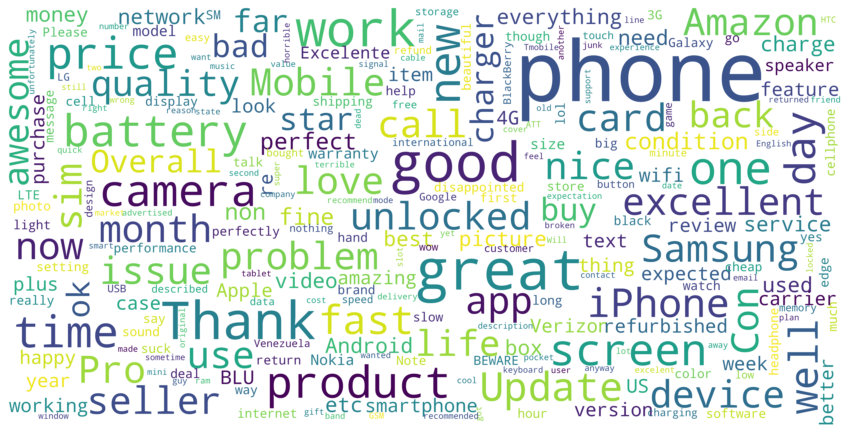

In [42]:
# Visualise using word cloud
from wordcloud import WordCloud
import matplotlib as plt
import matplotlib.pyplot as plt

split_title = [x.split(" ") for x in data['Reviews'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### TEXT Blob

In [76]:
#Function to extract features from text
def textBlob_feature_extraction(text): 
        blob = TextBlob(text)
        return blob.noun_phrases

In [77]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob

In [78]:
def review_to_wordlist( review, remove_stopwords=True):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()

    #
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (True by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    b=[]
    lemmatizer = WordNetLemmatizer()
    for word in words:
        b.append(lemmatizer.lemmatize(word))

    # 5. Return a list of words
    return(b)

In [79]:
clean_reviews = []
for review in data['Reviews']:
    clean_reviews.append( " ".join(review_to_wordlist(review)))

In [45]:
# #inserting Cleaned reviews sentences to our dataset
# data.insert(2, 'cleaned_reviews ', clean_reviews)

# #Extracting Features From Reviews Sentences
# features = []
# for reviews in clean_reviews:
#     features.append(textBlob_feature_extraction(reviews))

# data['texblob_features_extraction']=features

In [ ]:
def func():
    

In [46]:
data['sentiment']=data['score'].apply(lambda x : 'pos' if x['pos'] >x['neg'] else 'neg')

In [ ]:
data

In [47]:
data.head()

,Product Name,Brand Name,cleaned_reviews,Price,Rating,Reviews,Review Votes,word_count,score,texblob_features_extraction,sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,feel lucky found used phone u used hard phone ...,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,72,"{'neg': 0.015, 'neu': 0.796, 'pos': 0.189, 'co...","[phone u, phone line]",pos
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,nice phone nice grade pantach revue clean set ...,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,40,"{'neg': 0.072, 'neu': 0.597, 'pos': 0.331, 'co...","[nice phone, nice grade pantach revue, clean s...",pos
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,pleased,199.99,5,Very pleased,0.0,2,"{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'comp...",[],pos
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,work good go slow sometimes good phone love,199.99,4,It works good but it goes slow sometimes but i...,0.0,17,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...","[work good, good phone]",pos
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,great phone replace lost phone thing volume bu...,199.99,4,Great phone to replace my lost phone. The only...,0.0,43,"{'neg': 0.038, 'neu': 0.897, 'pos': 0.065, 'co...","[great phone, phone thing volume button work, ...",pos


In [48]:
prod_features_counts = {}
for prod,feature_list, in zip(data['Product Name'],data['texblob_features_extraction']):
    for feature in feature_list:
        if prod in prod_features_counts:
            if feature in prod_features_counts[prod]:
                prod_features_counts[prod][feature] += 1
            else:
                prod_features_counts[prod][feature] = 1 
        else:
            prod_features_counts[prod]={}

#Extracting feature count form feartures
dist_products =[]
dist_feature_count= []
for key, value in prod_features_counts.items() :
    dist_products.append(key)
    dist_feature_count.append(value)
    
#Features Counts Dataset 
products_features_details = pd.DataFrame()
products_features_details['products'] = dist_products
products_features_details['feature with count'] = dist_feature_count
products_features_details.head(10)

,products,feature with count
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...","{'phone line': 1, 'nice phone': 1, 'nice grade..."
1,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...","{'excellent product': 4, 'perfect condition': ..."
2,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,"{'verizon store battery work': 1, 'hr verizon'..."
3,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...","{'great price': 2, 'ups ups guy': 1, 'screen d..."
4,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,"{'charge cradle': 1, 'lg flip phone cost': 1, ..."
5,[XMAS DEAL] Jethro [SC118] Simple Unlocked Qua...,"{'poor speaker phone': 1, 'great phone': 3, 'e..."
6,10.6'' Inch E-passion Unlocked Smart Phone +Ta...,"{'tablet phone work': 1, 'worth money': 1, 'me..."
7,"2.45 "" IPS Touch Screen the World's Smallest A...","{'phone microphone doesnt work': 2, 'unhappy p..."
8,"2.45"" UNLOCKED Rugged Micro Android Smart Phon...",{'return mine waste money': 1}
9,"2016 GSM Factory Unlocked! Smartphone 6"" QHD A...","{'indigi workin hope ok': 1, 'sim card use': 1..."


In [49]:
data = data.loc[(data['sentiment'] == 'pos')]

positive_features_counts = {}
for prod,feature_list, in zip(data['Product Name'],data['texblob_features_extraction']):
    for feature in feature_list:
        if prod in positive_features_counts:
            if feature in positive_features_counts[prod]:
                positive_features_counts[prod][feature] += 1
            else:
                positive_features_counts[prod][feature] = 1 
        else:
            positive_features_counts[prod]={}

#Extracting feature count form feartures
dist_products =[]
dist_feature_count= []
for key, value in positive_features_counts.items() :
    dist_products.append(key)
    dist_feature_count.append(value)
    
#----------------- Features Counts Dataset ------------------
positive_features_details = pd.DataFrame()
positive_features_details['products'] = dist_products
positive_features_details['feature with count'] = dist_feature_count
positive_features_details.head(10)

,products,feature with count
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...","{'phone line': 1, 'nice phone': 1, 'nice grade..."
1,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...","{'perfect condition': 1, 'practical user': 1, ..."
2,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,"{'sum card adapter': 1, 'micro sim cat work': ..."
3,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...","{'great price': 1, 'ups ups guy': 1, 'screen d..."
4,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,"{'charge cradle': 1, 'lg flip phone cost': 1, ..."
5,[XMAS DEAL] Jethro [SC118] Simple Unlocked Qua...,"{'expectation dad': 2, 'issue expectation mism..."
6,10.6'' Inch E-passion Unlocked Smart Phone +Ta...,"{'nice daughter': 1, 'great phablet general': 1}"
7,"2.45"" UNLOCKED Rugged Micro Android Smart Phon...",{'return mine waste money': 1}
8,"2016 GSM Factory Unlocked! Smartphone 6"" QHD A...",{'indigi workin hope ok': 1}
9,2016 Latest Mini6 Small Android 5.1 Smart Mobi...,{}


In [50]:
negative_products_dataset = data.loc[(data['sentiment'] == 'neg')]

negative_features_counts = {}
for prod,feature_list, in zip(data['Product Name'],data['texblob_features_extraction']):
    for feature in feature_list:
        if prod in negative_features_counts:
            if feature in negative_features_counts[prod]:
                negative_features_counts[prod][feature] += 1
            else:
                negative_features_counts[prod][feature] = 1 
        else:
            negative_features_counts[prod]={}
            
#Extracting feature count form feartures
dist_products =[]
dist_feature_count= []
for key, value in negative_features_counts.items() :
    dist_products.append(key)
    dist_feature_count.append(value)
    
#----------------- Features Counts Dataset ------------------
negative_features_details = pd.DataFrame()
negative_features_details['products'] = dist_products
negative_features_details['feature with count'] = dist_feature_count
negative_features_details.head(10)

,products,feature with count
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...","{'phone line': 1, 'nice phone': 1, 'nice grade..."
1,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...","{'perfect condition': 1, 'practical user': 1, ..."
2,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,"{'sum card adapter': 1, 'micro sim cat work': ..."
3,"(LANDVO) 5.0"" Capacitive Touch MTK6582 Quad Co...","{'great price': 1, 'ups ups guy': 1, 'screen d..."
4,[XMAS DEAL] [New Edition] Jethro [SC213V2] Fli...,"{'charge cradle': 1, 'lg flip phone cost': 1, ..."
5,[XMAS DEAL] Jethro [SC118] Simple Unlocked Qua...,"{'expectation dad': 2, 'issue expectation mism..."
6,10.6'' Inch E-passion Unlocked Smart Phone +Ta...,"{'nice daughter': 1, 'great phablet general': 1}"
7,"2.45"" UNLOCKED Rugged Micro Android Smart Phon...",{'return mine waste money': 1}
8,"2016 GSM Factory Unlocked! Smartphone 6"" QHD A...",{'indigi workin hope ok': 1}
9,2016 Latest Mini6 Small Android 5.1 Smart Mobi...,{}


In [51]:
def get_text_sentiment(text):
   
    cleaned = review_to_wordlist(text)
    for sent in cleaned:
        analysis=TextBlob(sent)
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
             return 'pos'
        
        else: 
             return 'neg' 

In [ ]:
get_text_sentiment('')

In [52]:
#user_specification = input("Search Here")
user_specification = 'good phone with good battery life and affordable price '
user_specification_sentiment = get_text_sentiment(user_specification)
user_specification_features = textBlob_feature_extraction(user_specification)
for feature in user_specification_features:
    print(feature)
    
    
#Assiging weights to products with max matching 
prod_weight = {}
if(user_specification_sentiment == 'pos'):
    for prod in positive_features_counts:
        for feature in user_specification_features:
            if prod in prod_weight:
                if feature in positive_features_counts[prod]:
                    prod_weight[prod] = prod_weight[prod]+ positive_features_counts[prod][feature]                    
            else:
                if feature in positive_features_counts[prod]:
                    prod_weight[prod] = positive_features_counts[prod][feature]


dist_feature =[]
dist_feature_count= []                    
for key, value in prod_weight.items() :
    dist_feature.append(key)
    dist_feature_count.append(value)
    
rank_products = pd.DataFrame()
rank_products['product'] =dist_feature
rank_products['weight'] =dist_feature_count
rank_products= rank_products.sort_values(by ='weight' , ascending=False)
rank_products 

good phone
good battery life
affordable price


,product,weight
362,BLU Studio 7.0 II -Unlocked Smartphone - US GS...,26
750,Motorola Moto E (1st Generation) - Black - 4 G...,25
330,BLU Life Pure Unlocked Phone (Black),25
331,"BLU Life Pure Unlocked Phone 32GB ROM, 2GB RAM...",22
749,Motorola Moto E (1st Generation) - Black - 4 G...,21
...,...,...
1013,Samsung Galaxy Note 3 N9005 32GB 4G LTE PINK U...,1
429,Casio G'zOne Ravine C751 Rugged Cell Phone Ver...,1
638,LG G3 S D722 8GB Unlocked GSM 4G LTE Quad-Core...,1
431,"Caterpillar CAT B15Q Dual Sim, 4GB, IP67, Fact...",1


In [114]:
def user_specification(specification):
    
    user_specification_features = textBlob_feature_extraction(specification)
        
    
    
    #Assiging weights to products with max matching 
    prod_weight = {}
    if(sid.polarity_scores(specification)['pos'] > sid.polarity_scores(specification)['neg'] ):
               for prod in positive_features_counts:
                    for feature in user_specification_features:
                        if prod in prod_weight:
                            if feature in positive_features_counts[prod]:
                                prod_weight[prod] = prod_weight[prod]+ positive_features_counts[prod][feature]                    
                        else:
                            if feature in positive_features_counts[prod]:
                                prod_weight[prod] = positive_features_counts[prod][feature]


    dist_feature =[]
    dist_feature_count= []                    
    for key, value in prod_weight.items() :
        dist_feature.append(key)
        dist_feature_count.append(value)
    
    rank_products = pd.DataFrame()
    rank_products['product'] =dist_feature
#     rank_products['weight'] =dist_feature_count
    
#     rank_products= rank_products.sort_values(by ='weight' , ascending=False)
    return rank_products.head().to_dict()

In [116]:
def predict(text):
    
    
    user_specification_features = textBlob_feature_extraction(text)
        
    
    
    #Assiging weights to products with max matching 
    prod_weight = {}
    if(sid.polarity_scores(text)['pos'] > sid.polarity_scores(text)['neg'] ):
               for prod in positive_features_counts:
                    for feature in user_specification_features:
                        if prod in prod_weight:
                            if feature in positive_features_counts[prod]:
                                prod_weight[prod] = prod_weight[prod]+ positive_features_counts[prod][feature]                    
                        else:
                            if feature in positive_features_counts[prod]:
                                prod_weight[prod] = positive_features_counts[prod][feature]


    dist_feature =[]
    dist_feature_count= []                    
    for key, value in prod_weight.items() :
        dist_feature.append(key)
        dist_feature_count.append(value)
    
    rank_products = pd.DataFrame()
    rank_products['product'] =dist_feature

    


    pred = rank_products.head().to_dict()
    return pred

In [117]:
predict("nice phone")

{'product': {0: '"CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN',
  1: '[XMAS DEAL] [New Edition] Jethro [SC213V2] Flip Quad-band Unlocked GSM Senior & Kids Cell Phone, SOS Emergency Button, 2.4" Large LCD with Large Keypad.',
  2: '4 Inch Touch Screen Cell Phone Unlocked, Android Unlocked Gsm Smartphones Dual Camera Dual Sim Dual Standby No Contract (Blue)',
  3: '5.5" Unlocked GSM Cell Phones Android 5.1 MTK6580 Quad Core Dual Sim Quadband-JUNING 3G Smartphone Black',
  4: '5.5" Unlocked GSM Phones Android 5.1 MTK6580 Quad Core Dual Sim Quadband-JUNING 3G Smartphone Gold'}}

Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-20:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/_threaded_server.py", line 362, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", 

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-23:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/_threaded_server.py", line 362, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", 

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-26:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/_threaded_server.py", line 362, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", 

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-29:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/_threaded_server.py", line 362, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", 

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-32:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/_threaded_server.py", line 362, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", 

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-35:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/_threaded_server.py", line 362, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", 

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-38:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 286, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", line 278, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/_threaded_server.py", line 362, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/anvil/server.py", 

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
